 # **Relatório de Análise do Desempenho de Turbinas Eólicas**
---
**Resumo Executivo**

Este relatório apresenta uma análise dos dados de registros da potência de energia que as Turbinas de Energia Eólica produzem. O objetivo é examinar as medições e verificar se o desempenho das turbinas está dentro do esperado ou está havendo algum possível problema.

**Bibliotecas Utilizadas:**

* Pandas
* Seaborn
* matplotlib
* adjustText

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from adjustText import adjust_text

## **1. Carregar Arquivo**
---

#### Começando por ler o arquivo T1.csv, que possue o seguinte resumo de colunas:
* **Registro:** A data e hora do registro da Potência da Turbina
* **Potência (kW):** Potência registrada da Turbina
* **Vento (m/s):** Velocidade do vento durante o registro
* **Curva_Teórica (KWh):** Potência ideal da turbina pela velocidade do tempo

Não usarei a coluna **'Direção_Vento'** nesta análise, pois ela não é necessária. Isso visando que a turbina gira em direção ao vento. Se houver algum defeito em seu sensor de rotação, a direção em que ela está virada não consegue me dizer se é esse o problema, uma vez que não existem informações específicas sobre a turbina em questão

In [5]:
Energia = pd.read_csv('T1.csv')
Energia.columns = ['Registro', 'Potência (kW)', 'Vento (m/s)', 'Curva_Teórica (KWh)', 'Direção_Vento (°)']
Energia.drop(columns='Direção_Vento (°)', inplace=True)
Energia['Registro'] = pd.to_datetime(Energia['Registro'])
display(Energia)

,Registro,Potência (kW),Vento (m/s),Curva_Teórica (KWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


Foi necessário ajuste nos dados da coluna **Registro** para correta utilização dos dados, os demais parecem estar corretos mas para ter certeza é necessário fazer uma Análise Exploratória


## **2. Análise Exploratória de Dados (EDA)**
---
Agora vou verificar a qualidade dos dados para saber se há algum problema e ter uma análise básica do seu conteúdo.

### **2.1 Resumo Estatístico**
---
Obter resumo estatístico, com as principais métricas desse Dataframe

In [6]:
Energia.describe()

,Potência (kW),Vento (m/s),Curva_Teórica (KWh)
count,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463
std,1312.459242,4.227166,1368.018238
min,-2.471405,0.000000,0.000000
25%,50.677890,4.201395,161.328167
50%,825.838074,7.104594,1063.776283
75%,2482.507568,10.300020,2964.972462
max,3618.732910,25.206011,3600.000000


### **2.2 Valores Vazios**
---
Verificando se há valores faltando ou vazios.

In [7]:
Energia.isnull().sum()

Registro               0
Potência (kW)          0
Vento (m/s)            0
Curva_Teórica (KWh)    0
dtype: int64

### **2.3 Primeira Visualização**
---
Vou plotar os dados da Potência pelo Vento registrados através de um gráfico de dispersão, pois ele será o ideal para poder ver como os valores estão se distribuindo.

Text(0.5, 1.0, 'Dispersão dos Registros')

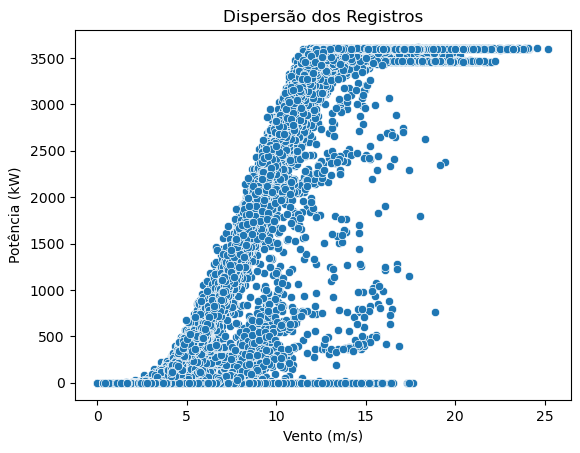

In [8]:
sns.scatterplot(data=Energia, x='Vento (m/s)', y='Potência (kW)')
plt.title('Dispersão dos Registros')

### **2.4 Curva Ideal**
---
Agora vou criar o mesmo gráfico de dispersão só que com a coluna Curva_Teórica pelo Vento, para ver de que forma o gráfico seria se não houvesse nenhum problema com as Turbinas e elas produzissem a Energia esperada.

Text(0.5, 1.0, 'Dispersão Ideal de Energia')

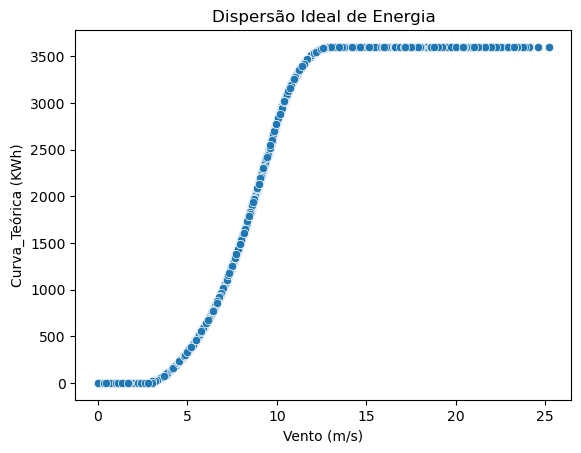

In [9]:
sns.scatterplot(data=Energia, x='Vento (m/s)', y='Curva_Teórica (KWh)')
plt.title('Dispersão Ideal de Energia')

## **3. Insights de Análise**
---
Após as primeiras Análises vou retirar minhas primeiras conclusões e melhorar os dados afim de as conferir para dimensionar o tamanho dos problemas

### **3.1 Desempenho das Turbinas**
---
Com base nos dois gráficos é possível notar que o gráfico da Dispersão dos Registros mesmo que cresça de forma parecida com a Dispersão Ideal, ainda possue muitos pontos muito fora do ideal

### **3.2 Determinar um Limite**
---
Para quantificar quantas turbinas estão apresentando medição inadequada, vou definir oque seria uma medição adequada estabelecendo um limite, que será de 5% para cima e 10% para baixo, qualquer medição fora desse limite está fora do desemepnho desejado.

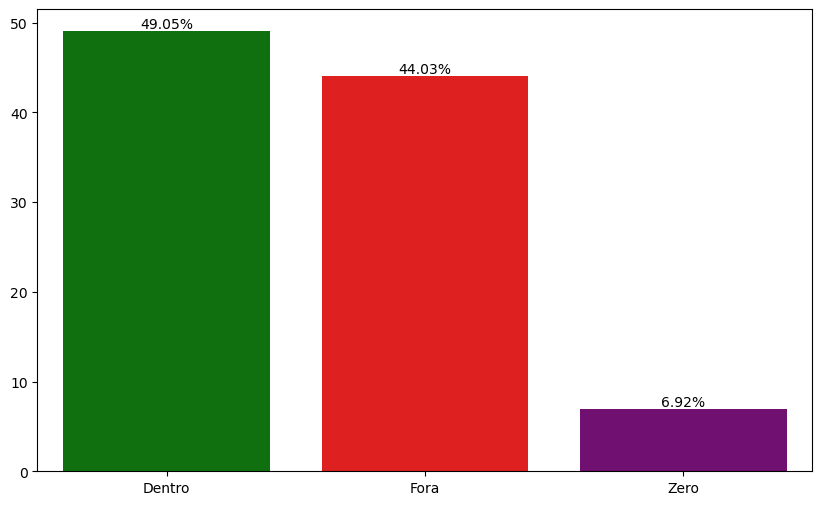

In [21]:
#criação da coluna DentroLim
pot_real = Energia['Potência (kW)'].to_list()
rpot_teorica = Energia['Curva_Teórica (KWh)'].to_list()
pot_max = [pot * 1.05 for pot in pot_teorica]
pot_min = [pot * 0.9 for pot in pot_teorica]
dentro_lim = ['Dentro' if pot_max[p]>=pot>=pot_min[p] 
              else 'Zero' if pot==0 
              else 'Fora' 
              for p, pot in enumerate(pot_real)]
Energia['DentroLim'] = dentro_lim

#Plot dos dados  da coluna
figure(figsize=(10, 6))
Porcentagem = Energia['DentroLim'].value_counts()/len(Energia) * 100
cores = {'Dentro': 'Green', 'Fora': 'Red', 'Zero': 'Purple'}
ax = sns.barplot(data=Energia, x=Porcentagem.index, y=Porcentagem.values, palette=cores)
porcent = ["{:.2f}%".format(valor) for valor in ax.containers[0].datavalues]
ax = ax.bar_label(ax.containers[0], labels=porcent)

**Anáise dos dados do limite**

Após a delimitação do que é aceitável, é possível ver pelo gráfico de barras que 50,95% das medições estão fora do esperado sendo 44,03% muito acima ou muito abaixo e 6,92% estão zeradas. Algo que representa uma taxa de ineficiência muito grande das turbinas, sendo acima do esperado.

### 3.3 Criando o gráfico novamente

6. Criando o gráfico novamente

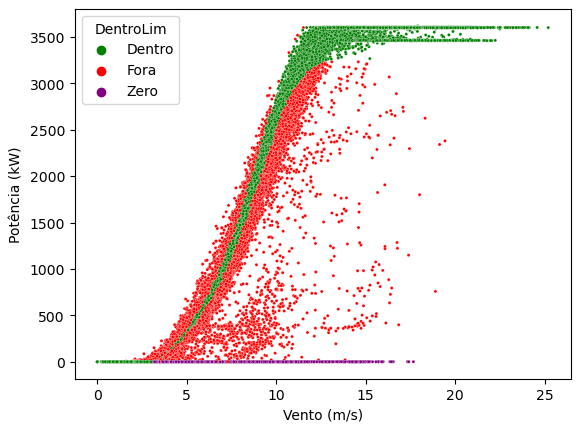

In [20]:
#cores = {'Dentro': 'Green', 'Fora': 'Red', 'Zero': 'Purple'}
grafico = sns.scatterplot(data=Energia, x='Vento (m/s)', y='Potência (kW)', hue='DentroLim',s=5, palette=cores)

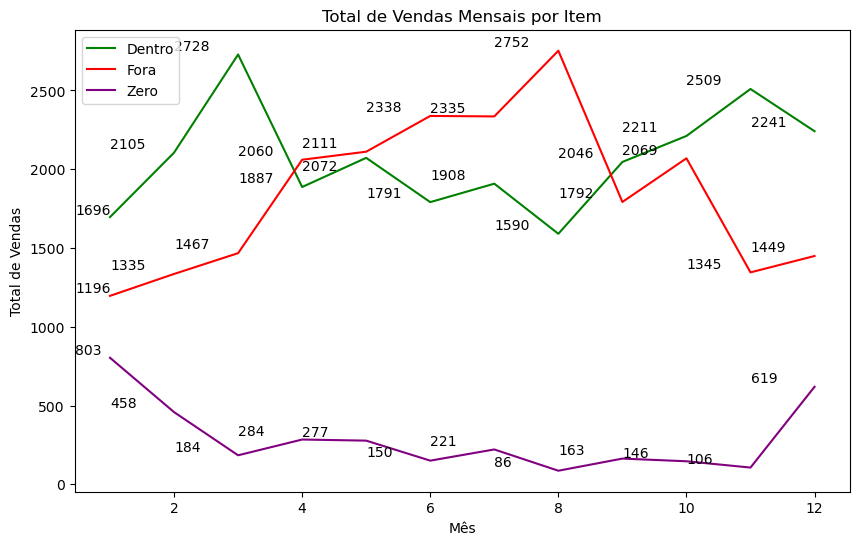

In [29]:
##### import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Suponha que você tenha um DataFrame chamado df com as colunas "Mês", "Item1", "Item2" e "Item3".
Energia['Mês'] = Energia['Registro'].dt.month
# Agrupe os dados por mês e some as vendas de cada item
total_vendas = Energia.groupby(['Mês', 'DentroLim']).size().unstack(fill_value=0)
#display(total_vendas)
# Crie um gráfico de linhas
figure(figsize=(10, 6))
for produto in total_vendas.columns:
    plt.plot(total_vendas.index, total_vendas[produto], label=produto, color=cores.get(produto, 'black'))

# Adicione rótulos e título
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.title('Total de Vendas Mensais por Item')

# Adicione uma legenda
plt.legend()
texts = []
for produto in total_vendas.columns:
    for mes, total in enumerate(total_vendas[produto]):
        text = plt.text(mes, total, str(total), fontsize=10, color='black')
        texts.append(text)

# Use o adjustText para ajustar automaticamente os rótulos e evitar sobreposições
adjust_text(texts, only_move={'points':'y', 'texts':'y'})

# Exiba o gráfico
plt.show()

In [204]:
total_vendas['Total'] = total_vendas['Dentro'] + total_vendas['Fora'] + total_vendas['Zero']
total_vendas.sort_values(by='Total', ascending=False)

DentroLim,Dentro,Fora,Zero,Total
Mês,,,,
7,1908,2335,221,4464
5,2072,2111,277,4460
8,1590,2752,86,4428
10,2211,2069,146,4426
3,2728,1467,184,4379
12,2241,1449,619,4309
6,1791,2338,150,4279
4,1887,2060,284,4231
9,2046,1792,163,4001


In [209]:
t = Energia.sort_values(by='Registro', ascending=True).loc[Energia['Potência (kW)']==0]
t.head(50)

,Registro,Potência (kW),Vento (m/s),Curva_Teórica (KWh),DentroLim,Mês
7849,2018-01-03 00:00:00,0.0,4.684498,262.106349,Zero,1
7850,2018-01-03 00:10:00,0.0,4.377705,196.552935,Zero,1
7851,2018-01-03 00:20:00,0.0,3.969311,122.183057,Zero,1
7852,2018-01-03 00:30:00,0.0,4.819459,292.853913,Zero,1
7853,2018-01-03 00:40:00,0.0,5.434208,450.271238,Zero,1
7854,2018-01-03 00:50:00,0.0,5.599916,498.207070,Zero,1
7855,2018-01-03 01:00:00,0.0,5.864426,580.200955,Zero,1
7856,2018-01-03 01:10:00,0.0,5.481966,463.827034,Zero,1
7857,2018-01-03 01:20:00,0.0,6.521284,814.341604,Zero,1
7858,2018-01-03 01:30:00,0.0,6.490254,802.183877,Zero,1
